<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_%EC%95%99%EC%83%81%EB%B8%94(Ensemble)_%EA%B8%B0%EB%B2%95_Voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

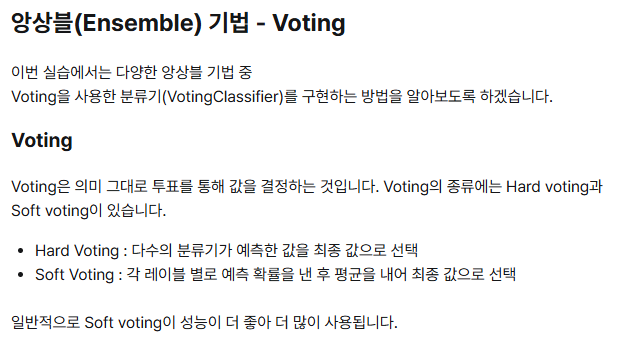

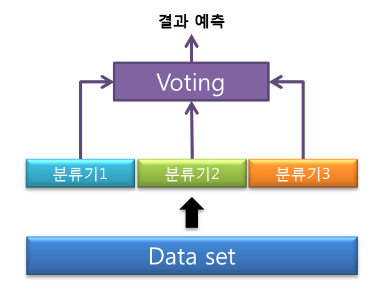

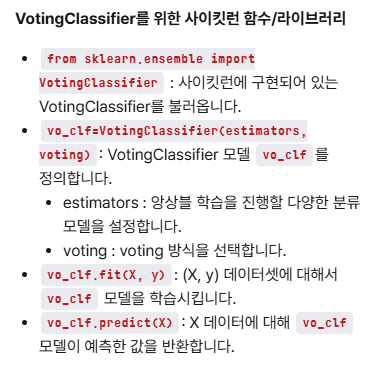

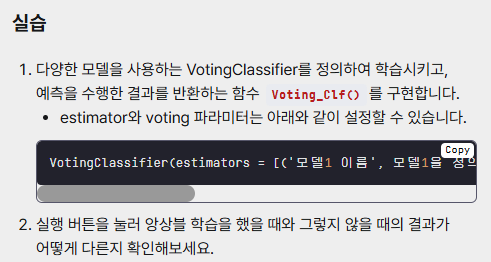

In [ ]:
VotingClassifier(estimators = [('모델1 이름', 모델1을 정의한 변수), ('모델2 이름', 모델2를 정의한 변수),...('모델N 이름', 모델N을 정의한 변수)], voting = 'soft')

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터를 불러오고,학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():

    X, y = load_breast_cancer(return_X_y = True)

    train_X, test_X, train_y ,test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)

    return train_X, test_X, train_y ,test_y
"""
1. 다양한 모델을 사용하는 VotingClassifier를 정의하여
   학습시키고, 예측을 수행한 결과를 반환하는 함수를 구현합니다.

   Step01. Voting과 비교할 각각 다른 분류 모델을 불러옵니다.

           불러올 분류 모델은
           LogisticRegression,
           KNeighborsClassifier 입니다.

   Step02. Voting에 사용할 분류 모델을 설정하여
           VotingClassifier를 정의합니다.

           estimators로는
           'lr'이라는 이름으로 LogisticRegressor인 lr_clf,
           'knn'이라는 이름으로 KNeighborClassifier인 knn_clf를 사용합니다.
           Voting 방식은 'soft'로 지정합니다.

   Step03. Voting Classifier를
           학습용 데이터에 맞춰 학습을 시킵니다.

   Step04. 테스트 데이터에 대한 예측을 수행합니다.
"""
def Voting_Clf(train_X, test_X, train_y ,test_y):

    lr_clf = LogisticRegression()
    knn_clf = KNeighborsClassifier()

    vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

    vo_clf.fit(train_X, train_y)

    pred = vo_clf.predict(test_X)

    return lr_clf, knn_clf, vo_clf, pred

# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():

    train_X, test_X, train_y ,test_y = load_data()

    lr_clf, knn_clf,vo_clf, pred = Voting_Clf(train_X, test_X, train_y ,test_y)

    print('> Voting Classifier 정확도 : {0:.4f}\n'.format(accuracy_score(test_y, pred)))

    # 다른 분류기를 각각 학습했을 때 결과 예측
    classifiers = [lr_clf, knn_clf]
    for classifier in classifiers:
        classifier.fit(train_X, train_y)
        pred = classifier.predict(test_X)
        class_name = classifier.__class__.__name__
        print("> {0} 정확도 : {1:.4f}".format(class_name, accuracy_score(test_y, pred)))

if __name__ =="__main__":
    main()

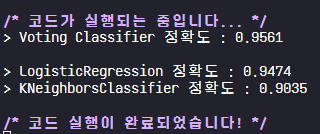